In [23]:
! pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.0 MB 2.5 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.0 MB 2.7 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.0 MB 2.5 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.0 MB 2.4 MB/s eta 0:00:04
   ----------- ---------------------------- 3.1/11.0 MB 2.4 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.0 MB 2.3 MB/s eta 0:00:04
   --------------- ------------------------ 4.2/11.0 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.0 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/11.0 MB 2.3 MB/s eta 0:00:03
   -------------------- ------------------- 5.5/11.0 MB 2.3 MB/s eta 0:00:03
   ----------

In [1]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1

In [2]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    return np.sqrt(np.sum((p - q) ** 2))

In [3]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    if _dist(p, q) <= eps:
        return True
    else:
        return False
    

In [4]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]   # Number of points
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    for point in range(n_points):
        if _eps_neighborhood(np.array(m[:, point_id]), np.array(m[:, point]), eps):
            seeds.append(point)

    return seeds

In [5]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    # Find all neighbors of point_id
    seeds = _region_query(m, point_id, eps)
    
    # If point_id is not a core point (doesn't have enough neighbors), and it doesnt within the range of a core point
    ## Therefore, it is NOISE
    if len(seeds) < min_points:
        classifications[point_id] = NOISE  
        return False  
    
    # If it's a core point, assign it and its neighbors to the cluster
    classifications[point_id] = cluster_id  
    for seed in seeds:
        classifications[seed] = cluster_id
    
    # Expand the cluster
    while seeds:
        current_point = seeds[0]  # Get the first point in the seeds list
        results = _region_query(m, current_point, eps)  # Get the neighbors of the current point
        # If the current point is a core point, expand the cluster
        if len(results) >= min_points:
            for result_point in results:
                if classifications[result_point] == UNCLASSIFIED or classifications[result_point] == NOISE:
                    if classifications[result_point] == UNCLASSIFIED:
                        seeds.append(result_point)  # Add this point to expand the cluster further
                    classifications[result_point] = cluster_id  # Assign the cluster id
        
        # Remove the seeds 
        seeds = seeds[1:]
    
    return True  # Cluster expansion succeeded

In [6]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here

     # Iterate through all points
    for point_id in range(n_points):
        if classifications[point_id] == UNCLASSIFIED:
            # Try to expand a cluster 
            if _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
                cluster_id += 1  # Change into next cluster
    
    return classifications

In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

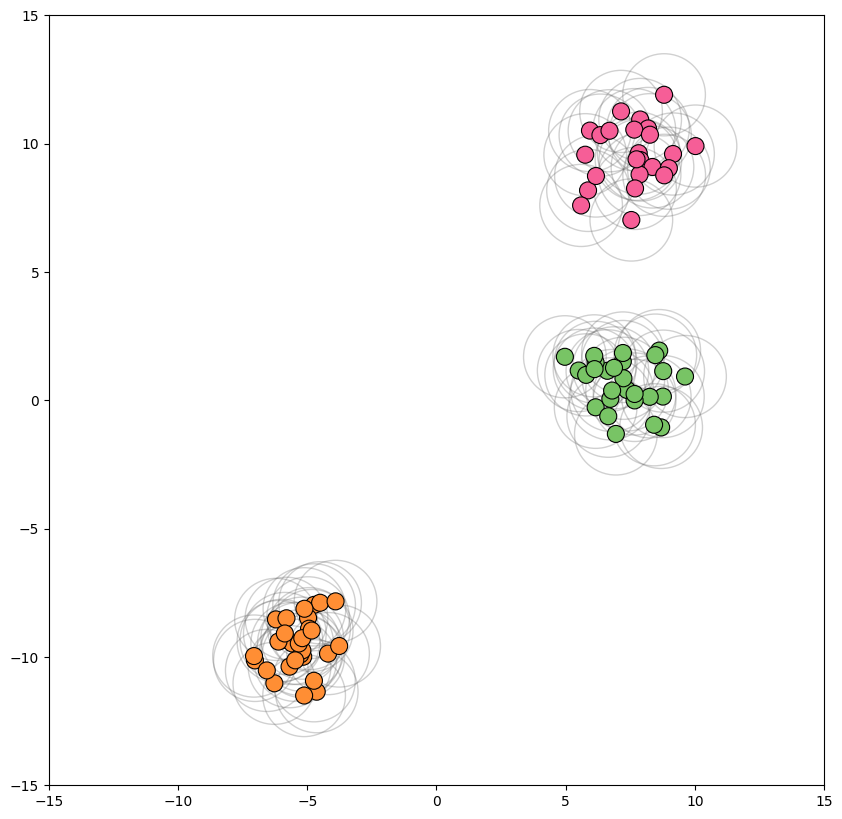

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [10]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [11]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

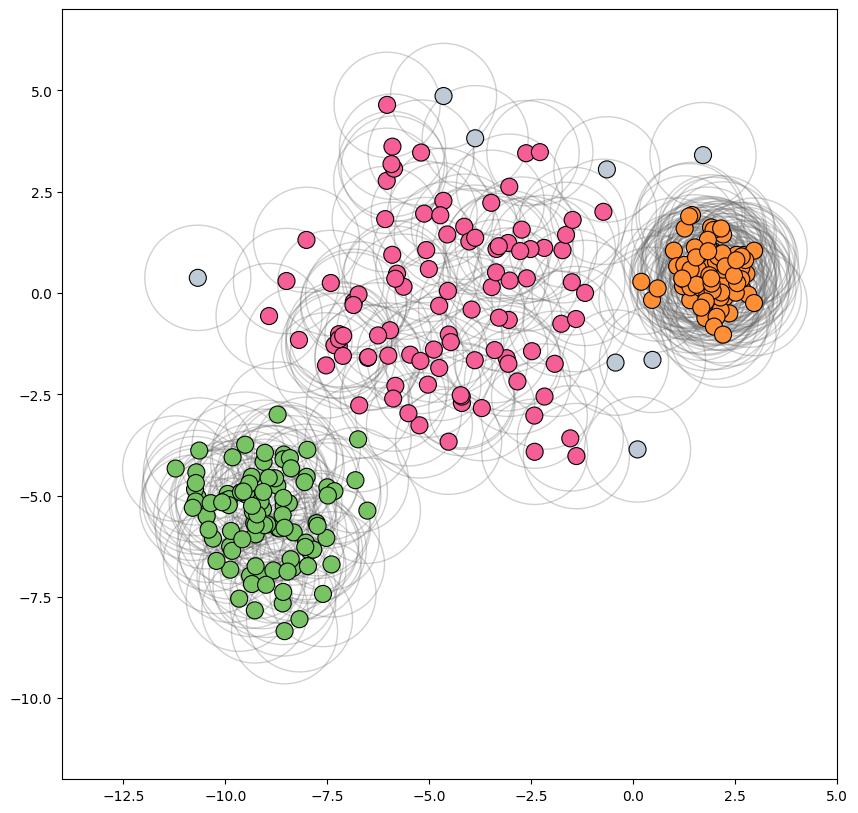

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
